# Introduction to Numerical Integration (Quadrature)
---
GENERAL PROBLEM: numerically evaluate a definite integral.

IDEA: approximate the integral by a discrete sum

\begin{equation}
   I \equiv \int_{a}^{b} f(x)\,dx \approx \sum_{i=0}^{n} c_{i}\,f(x_{i})
\end{equation}

This method of approximating an integral by a sum is often called **numerical quadrature** ("quadrature" being an archaic way of saying "box counting").

PRE-REQUISITE: heavy use is made of Lagrange (polynomial) interpolation (see
[interp-lagrange.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/Interpolation/interp-lagrange.ipynb).)


## Newton-Cotes Formulae ##

We start by approximating the function $f(x)$ by a single $n$th-degree interpolating polynomial $p(x)$ over the interval $[a,b]$, and then integrating that polynomial over the interval. Furthermore, we take the interpolating points (nodes) to be evenly spaced over $[a,b]$. There is a choice to be made whether to place nodes at the boundaries of the interval, or not. If nodes are placed at the boundaries, we obtain the **closed** Newton-Cotes formulae. If nodes are not placed at the boundaries, we obtain the **open** Newton-Cotes formulae.

### Closed Newton-Cotes formulae

**Trapezoid rule (n=1):** The simplest case to consider is to approximate the function by a straight line between the end points $f(a)$ and $f(b)$. The integral is then the area of the resulting trapezoid

\begin{equation}
   I \equiv \int_{a}^{b} f(x)\,dx \approx \frac{h}{2}(f(a) + f(b)),
\end{equation}

where $h = b - a$ is the width of the trapezoid. This can also be obtained from Lagrange's linear (1st-degree) interpolating polynomial

\begin{equation}
   p(x) = \frac{(x - x_{1})}{(x_{0} - x_{1})}f(x_{0})
   + \frac{(x - x_{0})}{(x_{1} - x_{0})}f(x_{1}) 
\end{equation}

where the nodes are located at $x_{0}=a$ and $x_{1}=b=a+h$. Integrating this fuction over $[a,b]$ yields the result above.

**Simpson's rule (n=2):** Next consider approximating the function by a 2nd-degree (quadratic) polynomial. Divide the interval $[a,b]$ into two equal subintervals of width $h=(b-a)/2$. Take nodes at $x_{0}=a$, $x_{1}=a+h$, and $x_{2}=a+2h=b$. Approximate $f(x)$ by the 2nd-degree polynomial

\begin{equation}
   p(x) = \frac{(x - x_{1})(x - x_{2})}{(x_{0} - x_{1})(x_{0} - x_{2})}f(x_{0})
   + \frac{(x - x_{0})(x - x_{2})}{(x_{1} - x_{0})(x_{1} - x_{2})}f(x_{1}) 
   + \frac{(x - x_{0})(x - x_{1})}{(x_{2} - x_{0})(x_{2} - x_{1})}f(x_{2}).
\end{equation}

Then integrate

\begin{equation}
   I \equiv \int_{a}^{b} f(x)\,dx 
   \approx \int_{a}^{b} p(x)\,dx
   = \frac{h}{3}[f(x_{0}) + 4f(x_{1}) + f(x_{2})],
\end{equation}

Similar considerations yield rules for higher-degree interpolating polynomials by dividing the interval $[a,b]$ into $n$ equally spaced subintervals, with $h=(b-a)/n$ and nodes at $x_{j}=a+jh$, for $j=0,1\ldots,n$. Notice that the cases considered above assume that the first and last nodes coincide with the boundary of the interval $[a,b]$. The first six closed Newton-Cotes formulae are listed here:

**n=1:** $\quad\quad I \approx \frac{h}{2}[f(x_{0}) + f(x_{1})] \quad\quad$ (trapezoid rule)

**n=2:** $\quad\quad I \approx \frac{h}{3}[f(x_{0}) + 4\,f(x_{1}) + f(x_{2})]\quad\quad$ (Simpson's rule)

**n=3:** $\quad\quad I \approx \frac{3h}{8}[f(x_{0}) + 3\,f(x_{1}) + 3\,f(x_{2}) + f(x_{3})]$

**n=4:** $\quad\quad I \approx \frac{2h}{45}[7\,f(x_{0}) + 32\,f(x_{1}) + 12\,f(x_{2}) + 32\,f(x_{3}) + 7\,f(x_{4})]$

**n=5:** $\quad\quad I \approx \frac{5h}{288}[19\,f(x_{0}) + 75\,f(x_{1}) + 50\,f(x_{2}) + 50\,f(x_{3}) + 75\,f(x_{4}) + 19\,f(x_{5})]$

**n=6:** $\quad\quad I \approx \frac{h}{140}[41\,f(x_{0}) + 216\,f(x_{1}) + 27\,f(x_{2}) + 272\,f(x_{3}) + 27\,f(x_{4}) + 216\,f(x_{5}) + 41\,f(x_{6})]$

(See [newton-cotes-closed.ipynb](https://github.com/ejwest2/math/blob/master/NumericalMethods/NumIntegrate/newton-cotes-closed.ipynb).) 

### Open Newton-Cotes formulae

**Midpoint rule (n=0):** Divide the interval $[a,b]$ into two equally spaced subintervals of width $h=(b-a)/2$. Take one node at $x_{0}=a+h=b-h$. Approximate the function $f(x)$ by the constant $f(x_{0})$ (0th-degree polynomial). Then

\begin{equation}
   I  \approx \int_{a}^{b}f(x_{0})\,dx
   = 2\,h\,f(x_{0}).
\end{equation}

**Rule for n=1:** Divide the interval $[a,b]$ into three equally spaced subintervals of width $h=(b-a)/3$. Take nodes at $x_{0}=a+h$ and $x_{1}=a+2h=b-h$. Approximate the function $f(x)$ by the linear (1st-degree) interpolating polynomial, and then integrate.

This procedure can then be generalized to higher-degree interpolating polynomials by dividing the interval $[a,b]$ into $n+2$ equally spaced subintervals, with $h=(b-a)/(n+2)$ and nodes at $x_{j}=a+(j+1)h$, for $j=0,1\ldots,n$. The first six open Newton-Cotes formulae are listed here:

**n=0:** $\quad\quad I \approx 2\,h\,f(x_{0}) \quad\quad$ (midpoint rule)

**n=1:** $\quad\quad I \approx \frac{3h}{2}[f(x_{0}) + f(x_{1})]$

**n=2:** $\quad\quad I \approx \frac{4h}{3}[2\,f(x_{0}) - f(x_{1}) + 2\,f(x_{2})]$

**n=3:** $\quad\quad I \approx \frac{5h}{24}[11\,f(x_{0}) + f(x_{1}) + f(x_{2}) + 11\,f(x_{3})]$

**n=4:** $\quad\quad I \approx \frac{3h}{10}[11\,f(x_{0}) - 14\,f(x_{1}) + 26\,f(x_{2}) - 14\,f(x_{3}) + 11\,f(x_{4})]$

**n=5:** $\quad\quad I \approx \frac{7h}{1440}[611\,f(x_{0}) - 453\,f(x_{1}) + 562\,f(x_{2}) + 562\,f(x_{3}) - 453\,f(x_{4}) + 611\,f(x_{5})]$

(See [newton-cotes-open.ipynb](https://github.com/ejwest2/math/blob/master/NumericalMethods/NumIntegrate/newton-cotes-open.ipynb).)

### CODE: Newton-Cotes Integration

In [5]:
# closed Newton-Cotes formulae

def ncClosed1 (f, a, b):
    h = (b - a)
    return (h/2)*(f(a) + f(b))

def ncClosed2 (f, a, b):
    h = (b - a)/2
    return (h/3)*(f(a) + 4*f(a+h) + f(b))

def ncClosed3 (f, a, b):
    h = (b - a)/3
    return (3*h/8)*(f(a) + 3*f(a+h) + 3*f(a+2*h) + f(b))

def ncClosed4 (f, a, b):
    h = (b - a)/4
    return (2*h/45)*(7*f(a) + 32*f(a+h) + 12*f(a+2*h) + 32*f(a+3*h) + 7*f(b))

def ncClosed5 (f, a, b):
    h = (b - a)/5
    return (5*h/288)*(19*f(a) + 75*f(a+h) + 50*f(a+2*h) + 50*f(a+3*h) \
                      + 75*f(a+4*h) + 19*f(b))

def ncClosed6 (f, a, b):
    h = (b - a)/6
    return (h/140)*(41*f(a) + 216*f(a+h) + 27*f(a+2*h) + 272*f(a+3*h) \
                    + 27*f(a+4*h) + 216*f(a+5*h) + 41*f(b))

# open Newton-Cotes formulae

def ncOpen0 (f, a, b):
    h = (b - a)/2
    return 2*h*f(a+h)

def ncOpen1 (f, a, b):
    h = (b - a)/3
    return (3*h/2)*(f(a+h) + f(a+2*h))

def ncOpen2 (f, a, b):
    h = (b - a)/4
    return (4*h/3)*(2*f(a+h) - f(a+2*h) + 2*f(a+3*h))

def ncOpen3 (f, a, b):
    h = (b - a)/5
    return (5*h/24)*(11*f(a+h) + f(a+2*h) + f(a+3*h) + 11*f(a+4*h))

def ncOpen4 (f, a, b):
    h = (b - a)/6
    return (3*h/10)*(11*f(a+h) - 14*f(a+2*h) + 26*f(a+3*h) \
                     - 14*f(a+4*h) + 11*f(a+5*h))

def ncOpen5 (f, a, b):
    h = (b - a)/7
    return (7*h/1440)*(611*f(a+h) - 453*f(a+2*h) + 562*f(a+3*h) \
                       + 562*f(a+4*h) - 453*f(a+5*h) + 611*f(a+6*h))

### Test: Integrate polynomials of degree $\leq n$ 
A rule of degree $n$ should yield the exact answer for any polynomial of degree $\leq n$. (If this is not intuitively obvious, it can also be seen because the error in approximating a function $f(x)$ by polynomial $p(x)$ of degree $n$ depends on the $(n+1)$-th and higher derivatives of $f(x)$. But all of these vanish identically if $f(x)$ is a polynomial of degree  $\leq n$.) Test the above numerical codes on the following exact results, to floating point precision of 16:

(a) $\quad I = \int_{0}^{1}\,dx = 1.000000000000000$

(b) $\quad I = \int_{0}^{1}(1 + x)\,dx = 1 + 1/2 = 1.500000000000000$ 

(c) $\quad I = \int_{0}^{1}(1 + x + x^2)\,dx = 1 + 1/2 + 1/3 = 1.833333333333333$ 

(d) $\quad I = \int_{0}^{1}(1 + x + x^2 + x^3)\,dx = 1 + 1/2 + 1/3 + 1/4 = 2.083333333333333$ 

(e) $\quad I = \int_{0}^{1}(1 + x + x^2 + x^3 + x^4)\,dx = 2.283333333333333$ 

(f) $\quad I = \int_{0}^{1}(1 + x + x^2 + x^3 + x^4 + x^5)\,dx = 2.450000000000000$ 

(g) $\quad I = \int_{0}^{1}(1 + x + x^2 + x^3 + x^4 + x^5 + x^6)\,dx = 2.592857142857143$ 

In [6]:
import numpy as np

In [7]:
# general test function
def ftest_gen (x, a0, a1, a2, a3, a4, a5, a6):
    return a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5 + a6*x**6

In [8]:
# test for case (a), n=0
a, b = 0, 1
def ftest (x):
    a0, a1, a2, a3, a4, a5, a6 = 1, 0, 0, 0, 0, 0, 0
    return ftest_gen(x, a0, a1, a2, a3, a4, a5, a6)

# exact result
iex = 1.

# run tests
ic1 = ncClosed1(ftest, a, b)
ic2 = ncClosed2(ftest, a, b)
ic3 = ncClosed3(ftest, a, b)
ic4 = ncClosed4(ftest, a, b)
ic5 = ncClosed5(ftest, a, b)
ic6 = ncClosed6(ftest, a, b)

io0 = ncOpen0(ftest, a, b)
io1 = ncOpen1(ftest, a, b)
io2 = ncOpen2(ftest, a, b)
io3 = ncOpen3(ftest, a, b)
io4 = ncOpen4(ftest, a, b)
io5 = ncOpen5(ftest, a, b)

# print results
print("exact: %.15f" % iex)
print("")
print("\t%s \t\t%s" % ('Closed:', 'Open:'))
print("%s \t%s \t\t\t%.15f \t%s" % ('n=0: ', '---', io0, '<=='))
print("%s \t%.15f \t%.15f" % ('n=1: ', ic1, io1))
print("%s \t%.15f \t%.15f" % ('n=2: ', ic2, io2))
print("%s \t%.15f \t%.15f" % ('n=3: ', ic3, io3))
print("%s \t%.15f \t%.15f" % ('n=4: ', ic4, io4))
print("%s \t%.15f \t%.15f" % ('n=5: ', ic5, io5))
print("%s \t%.15f \t%s" % ('n=6: ', ic6, '---'))


exact: 1.000000000000000

	Closed: 		Open:
n=0:  	--- 			1.000000000000000 	<==
n=1:  	1.000000000000000 	1.000000000000000
n=2:  	1.000000000000000 	1.000000000000000
n=3:  	1.000000000000000 	1.000000000000000
n=4:  	1.000000000000000 	1.000000000000000
n=5:  	1.000000000000000 	1.000000000000000
n=6:  	1.000000000000000 	---


In [9]:
# test for case (b), n=1
a, b = 0, 1
def ftest (x):
    a0, a1, a2, a3, a4, a5, a6 = 1, 1, 0, 0, 0, 0, 0
    return ftest_gen(x, a0, a1, a2, a3, a4, a5, a6)

# exact result
iex = 1. + 1/2.

# run tests
ic1 = ncClosed1(ftest, a, b)
ic2 = ncClosed2(ftest, a, b)
ic3 = ncClosed3(ftest, a, b)
ic4 = ncClosed4(ftest, a, b)
ic5 = ncClosed5(ftest, a, b)
ic6 = ncClosed6(ftest, a, b)

io0 = ncOpen0(ftest, a, b)
io1 = ncOpen1(ftest, a, b)
io2 = ncOpen2(ftest, a, b)
io3 = ncOpen3(ftest, a, b)
io4 = ncOpen4(ftest, a, b)
io5 = ncOpen5(ftest, a, b)

# print results
print("exact: %.15f" % iex)
print("")
print("\t%s \t\t%s" % ('Closed:', 'Open:'))
print("%s \t%s \t\t\t%.15f" % ('n=0: ', '---', io0))
print("%s \t%.15f \t%.15f \t%s" % ('n=1: ', ic1, io1, '<=='))
print("%s \t%.15f \t%.15f" % ('n=2: ', ic2, io2))
print("%s \t%.15f \t%.15f" % ('n=3: ', ic3, io3))
print("%s \t%.15f \t%.15f" % ('n=4: ', ic4, io4))
print("%s \t%.15f \t%.15f" % ('n=5: ', ic5, io5))
print("%s \t%.15f \t%s" % ('n=6: ', ic6, '---'))

exact: 1.500000000000000

	Closed: 		Open:
n=0:  	--- 			1.500000000000000
n=1:  	1.500000000000000 	1.500000000000000 	<==
n=2:  	1.500000000000000 	1.500000000000000
n=3:  	1.500000000000000 	1.500000000000000
n=4:  	1.500000000000000 	1.500000000000000
n=5:  	1.500000000000000 	1.500000000000000
n=6:  	1.500000000000000 	---


In [10]:
# test for case (c), n=2
a, b = 0, 1
def ftest (x):
    a0, a1, a2, a3, a4, a5, a6 = 1, 1, 1, 0, 0, 0, 0
    return ftest_gen(x, a0, a1, a2, a3, a4, a5, a6)

# exact result
iex = 1. + 1/2. + 1/3.

# run tests
ic1 = ncClosed1(ftest, a, b)
ic2 = ncClosed2(ftest, a, b)
ic3 = ncClosed3(ftest, a, b)
ic4 = ncClosed4(ftest, a, b)
ic5 = ncClosed5(ftest, a, b)
ic6 = ncClosed6(ftest, a, b)

io0 = ncOpen0(ftest, a, b)
io1 = ncOpen1(ftest, a, b)
io2 = ncOpen2(ftest, a, b)
io3 = ncOpen3(ftest, a, b)
io4 = ncOpen4(ftest, a, b)
io5 = ncOpen5(ftest, a, b)

# print results
print("exact: %.15f" % iex)
print("")
print("\t%s \t\t%s" % ('Closed:', 'Open:'))
print("%s \t%s \t\t\t%.15f" % ('n=0: ', '---', io0))
print("%s \t%.15f \t%.15f" % ('n=1: ', ic1, io1))
print("%s \t%.15f \t%.15f \t%s" % ('n=2: ', ic2, io2, '<=='))
print("%s \t%.15f \t%.15f" % ('n=3: ', ic3, io3))
print("%s \t%.15f \t%.15f" % ('n=4: ', ic4, io4))
print("%s \t%.15f \t%.15f" % ('n=5: ', ic5, io5))
print("%s \t%.15f \t%s" % ('n=6: ', ic6, '---'))

exact: 1.833333333333333

	Closed: 		Open:
n=0:  	--- 			1.750000000000000
n=1:  	2.000000000000000 	1.777777777777778
n=2:  	1.833333333333333 	1.833333333333333 	<==
n=3:  	1.833333333333333 	1.833333333333333
n=4:  	1.833333333333333 	1.833333333333334
n=5:  	1.833333333333333 	1.833333333333333
n=6:  	1.833333333333333 	---


In [11]:
# test for case (d), n=3
a, b = 0, 1
def ftest (x):
    a0, a1, a2, a3, a4, a5, a6 = 1, 1, 1, 1, 0, 0, 0
    return ftest_gen(x, a0, a1, a2, a3, a4, a5, a6)

# exact result
iex = 1. + 1/2. + 1/3. + 1/4.

# run tests
ic1 = ncClosed1(ftest, a, b)
ic2 = ncClosed2(ftest, a, b)
ic3 = ncClosed3(ftest, a, b)
ic4 = ncClosed4(ftest, a, b)
ic5 = ncClosed5(ftest, a, b)
ic6 = ncClosed6(ftest, a, b)

io0 = ncOpen0(ftest, a, b)
io1 = ncOpen1(ftest, a, b)
io2 = ncOpen2(ftest, a, b)
io3 = ncOpen3(ftest, a, b)
io4 = ncOpen4(ftest, a, b)
io5 = ncOpen5(ftest, a, b)

# print results
print("exact: %.15f" % iex)
print("")
print("\t%s \t\t%s" % ('Closed:', 'Open:'))
print("%s \t%s \t\t\t%.15f" % ('n=0: ', '---', io0))
print("%s \t%.15f \t%.15f" % ('n=1: ', ic1, io1))
print("%s \t%.15f \t%.15f" % ('n=2: ', ic2, io2))
print("%s \t%.15f \t%.15f \t%s" % ('n=3: ', ic3, io3, '<=='))
print("%s \t%.15f \t%.15f" % ('n=4: ', ic4, io4))
print("%s \t%.15f \t%.15f" % ('n=5: ', ic5, io5))
print("%s \t%.15f \t%s" % ('n=6: ', ic6, '---'))

exact: 2.083333333333333

	Closed: 		Open:
n=0:  	--- 			1.875000000000000
n=1:  	2.500000000000000 	1.944444444444444
n=2:  	2.083333333333333 	2.083333333333333
n=3:  	2.083333333333333 	2.083333333333333 	<==
n=4:  	2.083333333333333 	2.083333333333333
n=5:  	2.083333333333333 	2.083333333333334
n=6:  	2.083333333333333 	---


In [12]:
# test for case (e), n=4
a, b = 0, 1
def ftest (x):
    a0, a1, a2, a3, a4, a5, a6 = 1, 1, 1, 1, 1, 0, 0
    return ftest_gen(x, a0, a1, a2, a3, a4, a5, a6)

# exact result
iex = 1. + 1/2. + 1/3. + 1/4. + 1/5.

# run tests
ic1 = ncClosed1(ftest, a, b)
ic2 = ncClosed2(ftest, a, b)
ic3 = ncClosed3(ftest, a, b)
ic4 = ncClosed4(ftest, a, b)
ic5 = ncClosed5(ftest, a, b)
ic6 = ncClosed6(ftest, a, b)

io0 = ncOpen0(ftest, a, b)
io1 = ncOpen1(ftest, a, b)
io2 = ncOpen2(ftest, a, b)
io3 = ncOpen3(ftest, a, b)
io4 = ncOpen4(ftest, a, b)
io5 = ncOpen5(ftest, a, b)

# print results
print("exact: %.15f" % iex)
print("")
print("\t%s \t\t%s" % ('Closed:', 'Open:'))
print("%s \t%s \t\t\t%.15f" % ('n=0: ', '---', io0))
print("%s \t%.15f \t%.15f" % ('n=1: ', ic1, io1))
print("%s \t%.15f \t%.15f" % ('n=2: ', ic2, io2))
print("%s \t%.15f \t%.15f" % ('n=3: ', ic3, io3))
print("%s \t%.15f \t%.15f \t%s" % ('n=4: ', ic4, io4, '<=='))
print("%s \t%.15f \t%.15f" % ('n=5: ', ic5, io5))
print("%s \t%.15f \t%s" % ('n=6: ', ic6, '---'))

exact: 2.283333333333333

	Closed: 		Open:
n=0:  	--- 			1.937500000000000
n=1:  	3.000000000000000 	2.049382716049382
n=2:  	2.291666666666667 	2.276041666666667
n=3:  	2.287037037037037 	2.278266666666667
n=4:  	2.283333333333333 	2.283333333333333 	<==
n=5:  	2.283333333333333 	2.283333333333333
n=6:  	2.283333333333333 	---


In [11]:
# test for case (f), n=5
a, b = 0, 1
def ftest (x):
    c0, c1, c2, c3, c4, c5, c6 = 1, 1, 1, 1, 1, 1, 0
    return ftest_gen(x, c0, c1, c2, c3, c4, c5, c6)

# exact result
iex = 1. + 1/2. + 1/3. + 1/4. + 1/5. + 1/6.

# run tests
ic1 = ncClosed1(ftest, a, b)
ic2 = ncClosed2(ftest, a, b)
ic3 = ncClosed3(ftest, a, b)
ic4 = ncClosed4(ftest, a, b)
ic5 = ncClosed5(ftest, a, b)
ic6 = ncClosed6(ftest, a, b)

io0 = ncOpen0(ftest, a, b)
io1 = ncOpen1(ftest, a, b)
io2 = ncOpen2(ftest, a, b)
io3 = ncOpen3(ftest, a, b)
io4 = ncOpen4(ftest, a, b)
io5 = ncOpen5(ftest, a, b)

# print results
print("exact: %.15f" % iex)
print("")
print("\t%s \t\t%s" % ('Closed:', 'Open:'))
print("%s \t%s \t\t\t%.15f" % ('n=0: ', '---', io0))
print("%s \t%.15f \t%.15f" % ('n=1: ', ic1, io1))
print("%s \t%.15f \t%.15f" % ('n=2: ', ic2, io2))
print("%s \t%.15f \t%.15f" % ('n=3: ', ic3, io3))
print("%s \t%.15f \t%.15f" % ('n=4: ', ic4, io4))
print("%s \t%.15f \t%.15f \t%s" % ('n=5: ', ic5, io5, '<=='))
print("%s \t%.15f \t%s" % ('n=6: ', ic6, '---'))

exact: 2.450000000000000

	Closed: 		Open:
n=0:  	--- 			1.968750000000000
n=1:  	3.500000000000000 	2.117283950617284
n=2:  	2.479166666666667 	2.424479166666667
n=3:  	2.462962962962963 	2.432266666666667
n=4:  	2.450000000000000 	2.450000000000000
n=5:  	2.450000000000000 	2.450000000000000 	<==
n=6:  	2.450000000000000 	---


In [13]:
# test for case (g), n=6
a, b = 0, 1
def ftest (x):
    a0, a1, a2, a3, a4, a5, a6 = 1, 1, 1, 1, 1, 1, 1
    return ftest_gen(x, a0, a1, a2, a3, a4, a5, a6)

# exact result
iex = 1. + 1/2. + 1/3. + 1/4. + 1/5. + 1/6. + 1/7.

# run tests
ic1 = ncClosed1(ftest, a, b)
ic2 = ncClosed2(ftest, a, b)
ic3 = ncClosed3(ftest, a, b)
ic4 = ncClosed4(ftest, a, b)
ic5 = ncClosed5(ftest, a, b)
ic6 = ncClosed6(ftest, a, b)

io0 = ncOpen0(ftest, a, b)
io1 = ncOpen1(ftest, a, b)
io2 = ncOpen2(ftest, a, b)
io3 = ncOpen3(ftest, a, b)
io4 = ncOpen4(ftest, a, b)
io5 = ncOpen5(ftest, a, b)

# print results
print("exact: %.15f" % iex)
print("")
print("\t%s \t\t%s" % ('Closed:', 'Open:'))
print("%s \t%s \t\t\t%.15f" % ('n=0: ', '---', io0))
print("%s \t%.15f \t%.15f" % ('n=1: ', ic1, io1))
print("%s \t%.15f \t%.15f" % ('n=2: ', ic2, io2))
print("%s \t%.15f \t%.15f" % ('n=3: ', ic3, io3))
print("%s \t%.15f \t%.15f" % ('n=4: ', ic4, io4))
print("%s \t%.15f \t%.15f" % ('n=5: ', ic5, io5))
print("%s \t%.15f \t%s \t\t\t%s" % ('n=6: ', ic6, '---', '<=='))

exact: 2.592857142857143

	Closed: 		Open:
n=0:  	--- 			1.984375000000000
n=1:  	4.000000000000000 	2.161865569272976
n=2:  	2.656250000000000 	2.538085937500000
n=3:  	2.621399176954732 	2.554560000000000
n=4:  	2.593229166666667 	2.592103909465020
n=5:  	2.593066666666667 	2.592325193300978
n=6:  	2.592857142857142 	--- 			<==


### Another Example: Integrate $e^x$
Let's see how well the Newton-Cotes formulae work for the integral

\begin{equation}
   I = \int_{0}^{1} e^{x}\,dx = e - 1 \approx 1.718
\end{equation}

As in the previous test cases, the exact answer (shown above) can be found analytically. However, unlike in the previous cases, in this case the numerical integration rules should not reproduce the exact answer, but only an approximation to it. Let's see how well the various rules approximate the exact answer.

In [13]:
# exact answer
iex = np.e - 1
iex

1.718281828459045

In [14]:
# test function
f, a, b = np.exp, 0, 1

# numerical integrals
ic1 = ncClosed1(f, a, b)
ic2 = ncClosed2(f, a, b)
ic3 = ncClosed3(f, a, b)
ic4 = ncClosed4(f, a, b)
ic5 = ncClosed5(f, a, b)
ic6 = ncClosed6(f, a, b)

io0 = ncOpen0(f, a, b)
io1 = ncOpen1(f, a, b)
io2 = ncOpen2(f, a, b)
io3 = ncOpen3(f, a, b)
io4 = ncOpen4(f, a, b)
io5 = ncOpen5(f, a, b)

# print the results
print("Integrals using Newton-Cotes formulae of degree n:\n")
print("\t%s \t\t%s" % ('Closed:', 'Open:'))
print("%s \t%s \t\t\t%.15f" % ('n=0: ', '---', io0))
print("%s \t%.15f \t%.15f" % ('n=1: ', ic1, io1))
print("%s \t%.15f \t%.15f" % ('n=2: ', ic2, io2))
print("%s \t%.15f \t%.15f" % ('n=3: ', ic3, io3))
print("%s \t%.15f \t%.15f" % ('n=4: ', ic4, io4))
print("%s \t%.15f \t%.15f" % ('n=5: ', ic5, io5))
print("%s \t%.15f \t%s" % ('n=6: ', ic6, '---'))
print("")
print("%s %.15f \t%.15f" % ('exact: ', iex, iex))

Integrals using Newton-Cotes formulae of degree n:

	Closed: 		Open:
n=0:  	--- 			1.648721270700128
n=1:  	1.859140914229523 	1.671673233070383
n=2:  	1.718861151876593 	1.717776531966901
n=3:  	1.718540153360168 	1.717930168800450
n=4:  	1.718282687924758 	1.718280092678790
n=5:  	1.718282312990481 	1.718280601647986
n=6:  	1.718281829517721 	---

exact:  1.718281828459045 	1.718281828459045


In [15]:
# relative error
rc1 = abs((ic1 - iex)/iex)
rc2 = abs((ic2 - iex)/iex)
rc3 = abs((ic3 - iex)/iex)
rc4 = abs((ic4 - iex)/iex)
rc5 = abs((ic5 - iex)/iex)
rc6 = abs((ic6 - iex)/iex)

ro0 = abs((io0 - iex)/iex)
ro1 = abs((io1 - iex)/iex)
ro2 = abs((io2 - iex)/iex)
ro3 = abs((io3 - iex)/iex)
ro4 = abs((io4 - iex)/iex)
ro5 = abs((io5 - iex)/iex)

# print the results
print("Relative error for Newton-Cotes formulae of degree n:\n")
print("\t%s \t\t%s" % ('Closed:', 'Open:'))
print("%s \t%s \t\t\t%.15f" % ('n=0: ', '---', ro0))
print("%s \t%.15f \t%.15f" % ('n=1: ', rc1, ro1))
print("%s \t%.15f \t%.15f" % ('n=2: ', rc2, ro2))
print("%s \t%.15f \t%.15f" % ('n=3: ', rc3, ro3))
print("%s \t%.15f \t%.15f" % ('n=4: ', rc4, ro4))
print("%s \t%.15f \t%.15f" % ('n=5: ', rc5, ro5))
print("%s \t%.15f \t%s" % ('n=6: ', rc6, '---'))


Relative error for Newton-Cotes formulae of degree n:

	Closed: 		Open:
n=0:  	--- 			0.040482624332528
n=1:  	0.081976706869326 	0.027125116856099
n=2:  	0.000337152734757 	0.000294070788490
n=3:  	0.000150339075258 	0.000204657730048
n=4:  	0.000000500189025 	0.000001010183677
n=5:  	0.000000281986010 	0.000000713975460
n=6:  	0.000000000616125 	---


## Composite Integration

The Newton-Cotes results above form the building blocks of numerical integration. But as is, they are not enough. They fall short for two reasons. First, very high-degree interpolating polynomials may be needed to approximate a function over the interval $[a,b]$, but high-degree rules contain more functions calls, and therefore produce large amounts of roundoff error. Second, the above methods use evenly spaced subintervals, which for many functions will lead to wasted effort in some regions in order to achieve the desired precision in other regions.

To circumvent the need for interpolation using high-degree polynomials, we divide the full interval into subintervals and perform piecewise interpolation using low-degree polynomial over each subinterval.

### Composite Trapezoid Rule
Let's start with the simplest case, the trapezoid rule. Divide the interval $[a,b]$ into $N$ subintervals, and apply the trapezoid rule to each. The case of $N=1$ is just the non-composite trapezoid rule considered above. For the case $N=2$, we have $h=(b-a)/2$. On the first subinterval, we have the nodes at $x^{(1)}{}_{0}=a$ and $x^{(1)}{}_{1}=a+h$. On the second subinterval, $x^{(2)}{}_{0}=a+h$ and $x^{(2)}{}_{1}=b$. Applying the trapezoid rule to each subinterval gives

\begin{align*}
   I &\approx \frac{h}{2}[f(x^{(1)}{}_{0}) + f(x^{(1)}{}_{1}) 
   + f(x^{(2)}{}_{0}) + f(x^{(2)}{}_{1})] \\
   &\approx \frac{h}{2}[f(a) + f(a+h) + f(a+h) + f(b)] \\
   &\approx \frac{h}{2}[f(a) + 2\,f(a+h) + f(b)].
\end{align*}

Note that boundary nodes are weighted once, but interior nodes are weighted twice (because they act as the upper bound for one subinterval and the lower bound for the next subinterval). Continuing the process of subdividing the interval into $N$ subintervals

$N=3$: $\quad\quad I \approx \frac{h}{2}[f(a) + 2\,f(a+h) + 2\,f(a+2h) + f(b)]$

$N=4$: $\quad\quad I \approx \frac{h}{2}[f(a) + 2\,f(a+h) + 2\,f(a+2h) + 2\,f(a+3h) + f(b)]$

Generalizing to arbitrary $N$, we have $h=(b-a)/N$, and we can take the nodes to be located at $x_{j}=a+jh$ for $j=0,1,\ldots,N$. Then the composite trapezoid rule can be written as

\begin{equation}
   I \approx \frac{h}{2}\left[f(x_{0}) + 2\sum_{j=1}^{N-1}f(x_{j}) + f(x_{N})\right].
\end{equation}

### Composite Simpson's Rule
Applying the non-composite version of Simpson's rule above required three nodes on the interval $[a,b]$, with $x_{0}=a$, $x_{1}=a+h$, and $x_{2}=b$, where $h=(b-a)/2$. For $N=2$, we divide the interval $[a,b]$ into two subintervals, with $h=(b-a)/4$, and each of which is divided further into two (minor) subintervals. On the first (major) subinterval, we have the nodes at $x^{(1)}{}_{0}=a$, $x^{(1)}{}_{1}=a+h$, and $x^{(1)}{}_{2}=a+2h$. On the second subinterval, $x^{(2)}{}_{0}=a+2h$, $x^{(2)}{}_{1}=a+3h$, and $x^{(2)}{}_{2}=b$. Applying Simpson's rule to each subinterval gives

\begin{align*}
   I &\approx \frac{h}{3}[f(x^{(1)}{}_{0}) + 4\,f(x^{(1)}{}_{1}) + f(x^{(1)}{}_{2}) 
   + f(x^{(2)}{}_{0}) + 4\,f(x^{(2)}{}_{1}) + f(x^{(2)}{}_{2})] \\
   &\approx \frac{h}{3}[f(a) + 4\,f(a+h) + f(a+2h) + f(a+2h) + 4\,f(a+3h) + f(b)] \\
   &\approx \frac{h}{3}[f(a) + 4\,f(a+h) + 2\,f(a+2h) + 4\,f(a+3h) + f(b)].
\end{align*}

Notice that middle interior node is at the interior boundary between the two subintervals, and so gets counted twice. In general, every other interior node will lie at the interface betwen two adjacent subintervals. And so these interior nodes will contribute twoce to the overall sum. To make this explicit, we can carry out the procedure one more step

$N=3$: $\quad I \approx \frac{h}{3}[f(a) + 4\,f(a+h) + 2\,f(a+2h) + 4\,f(a+3h) + 2\,f(a+4h) + 4\,f(a+5h) + f(b)]$.

Generalizing to arbitrary $N$, we have $h=(b-a)/2N$, with nodes at $x_{j}=a+jh$ for $j=0,1,\ldots,2N$. The interior nodes that do not lie at the interface between adjacent (major) subintervals are multiplied by a factor of $4$. These are $x_{j}$ for $j=1,3,5,\ldots,2N-1$. The interior nodes that lie at the interface between adjacent (major) subintervals are multiplied by a factor of $2$. These are the nodes $x_{j}$ for $j=2,4,\ldots,2N-2$. So the composite Simpson's rule can be written as

\begin{equation}
   I \approx \frac{h}{3}\left[f(x_{0}) + 4\sum_{k=1}^{N/2}f(x_{2k-1}) 
   + 2\sum_{k=1}^{(N/2)-1}f(x_{2k}) + f(x_{2N})\right].
\end{equation}

### Composite Midpoint Rule
Finally, we consider the composite midpoint rule. Recall, for $N=1$ we had $h=(b-a)/2$ with one node at $x_{0}=a+h$. Now for $N=2$, we have $h=(b-a)/4$ with nodes at $x^{(1)}{}_{0}=a+h$ and $x^{(2)}{}_{0}=a+3h$. Applying the midpoint rule to each subinterval

\begin{align*}
   I &\approx 2h[f(x^{(1)}{}_{0}) + f(x^{(2)}{}_{0})] \\
   &\approx 2h[f(a+h) + f(a+3h)]
\end{align*}

In this case, all nodes are interior. Furthermore, nodes never lie at the interface between adjacent (major) subintervals. Therefore, each node is counted exactly once in the sum. Generalizing to arbitrary $N$, we have $h=(b-a)/2N$, with nodes at $x_{j}=a+(j+1)h$ for $j=0,2,\ldots,2N-2$. The composite midpoint rule can then be written as

\begin{equation}
   I \approx 2h\sum_{k=0}^{N-1}f(x_{2k}).
\end{equation}


### Remarks on Higher-Degree Composite Rules
Here we have only considered composite rules for the lowest degree Newton-Cotes formulae. Higher-degree composite rules could also be obtained, but this is rarely necessary (or wise?). Nevertheless, such rules could be obtained easily, if one were so inclined. For the closed Newton-Cotes schemes, one has to double-count interior nodes at the interface between adjacent subintervals. For the open Newton-Cotes schemes, all nodes are interior nodes, and they never lie at the interface between adjacent subintervals. As a result, all nodes are counted exactly once. This makes generalizing the open Newton-Cotes formulae especially easy. However, once alternating signs appear, as they do for open Newton-Cotes with $n>=2$, potential trouble arises due to near cancellation of terms in the sum. Therefore, such Newton-Cotes formulae should be avoided in numerical integration routines. (Note: this is not a problem unique to the open Newton-Cotes formulae. Eventually, at higher-degree, alternating signs appear for closed Newton-Cotes formulae as well.) Because the lower degree composite rules are usually sufficient, we only focus on writing functions for those.  

### CODE: Composite Trapezoid Integration

In [16]:
### trapezoid() ###

def trapezoid (f, a, b, N):
    """ composite trapezoid integration
    
    INPUT:
    f = function being integrated
    a = lower bound of integration interval 
    b = upper bound of integration interval
    N = number of subintervals to use (must be a positive integer)
    
    OUTPUT:
    integral = result of integration
    """
    # check that N is a positive integer
    if type(N) == int and N > 0:
        h = (b - a)/N  #subinterval width
        f_0 = f(a)     #function at first node
        f_N = f(b)     #function at last node
    else:
        print("trapezoid(): Error! Last argument must be a positive integer.")
        return
    
    # sum over interior nodes
    f_i = 0 
    for i in range(1, N):
        x_i = a + i*h 
        f_i = f_i + f(x_i)
    
    integral = (h/2)*(f_0 + 2*f_i + f_N)
    
    return integral

In [28]:
### test trapezoid() ###

# exact answer
exact = np.e - 1

# apply trapezoid rule
f, a, b = np.exp, 0, 1
trap1 = trapezoid(f, a, b, 1)
trap2 = trapezoid(f, a, b, 2)
trap4 = trapezoid(f, a, b, 4)
trap8 = trapezoid(f, a, b, 8)
trap16 = trapezoid(f, a, b, 16)
trap32 = trapezoid(f, a, b, 32)
trap64 = trapezoid(f, a, b, 64)
trap128 = trapezoid(f, a, b, 128)
p = 10; trapP = trapezoid(f, a, b, 2**p)

# print the results
print("\t\t%s \t\t%s" % ('integral:', 'relative error:'))
print("%s \t\t%.15f \t%.15f" % ('N=1: ', trap1, abs(trap1 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=2: ', trap2, abs(trap2 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=4: ', trap4, abs(trap4 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=8: ', trap8, abs(trap8 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=16: ', trap16, abs(trap16 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=32: ', trap32, abs(trap32 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=64: ', trap64, abs(trap64 - exact)))
print("%s \t%.15f \t%.15f" % ('N=128: ', trap128, abs(trap128 - exact)))
print("%s %d %s \t%.15f \t%.15f" % ('N=2 ^', p, ': ', trapP, abs(trapP - exact)))
print("")
print("%s \t%.15f" % ('exact: ', exact))

		integral: 		relative error:
N=1:  		1.859140914229523 	0.140859085770477
N=2:  		1.753931092464825 	0.035649264005780
N=4:  		1.727221904557517 	0.008940076098471
N=8:  		1.720518592164302 	0.002236763705257
N=16:  		1.718841128579994 	0.000559300120949
N=32:  		1.718421660316327 	0.000139831857282
N=64:  		1.718316786850094 	0.000034958391049
N=128:  	1.718290568083478 	0.000008739624433
N=2 ^ 10 :  	1.718281965015813 	0.000000136556768

exact:  	1.718281828459045


### CODE: Composite Simpson Integration

In [18]:
### simpson() ###

def simpson (f, a, b, N):
    """ composite Simpson integration
    
    INPUT:
    f = function being integrated
    a = lower bound of integration interval 
    b = upper bound of integration interval
    N = number of subintervals to use (must be a positive integer)
    
    OUTPUT:
    integral = result of integration
    """
    
    # check that N is a positive integer
    if type(N) == int and N > 0:
        h = (b - a)/(2.*N)  #subinterval width
        f_0 = f(a)         #function at first node
        f_N = f(b)         #function at last node
    else:
        print("simpson(): Error! Last argument must be a positive integer.")
        return
    
    # sum over odd interior nodes
    f_i_odd = 0 
    for i in range(1, 2*N, 2):
        x_i_odd = a + i*h 
        f_i_odd = f_i_odd + f(x_i_odd)

    # sum over even interior nodes
    f_i_even = 0 
    for i in range(2, 2*N, 2):
        x_i_even = a + i*h 
        f_i_even = f_i_even + f(x_i_even)

    integral = (h/3)*(f_0 + 4*f_i_odd + 2*f_i_even + f_N)
    
    return integral

In [29]:
### test simpson() ###

# exact answer
exact = np.e - 1

# apply simpson rule
f, a, b = np.exp, 0, 1
simp1 = simpson(f, a, b, 1)
simp2 = simpson(f, a, b, 2)
simp4 = simpson(f, a, b, 4)
simp8 = simpson(f, a, b, 8)
simp16 = simpson(f, a, b, 16)
simp32 = simpson(f, a, b, 32)
simp64 = simpson(f, a, b, 64)
simp128 = simpson(f, a, b, 128)

# print the results
print("\t\t%s \t\t%s" % ('integral:', 'relative error:'))
print("%s \t\t%.15f \t%.15f" % ('N=1: ', simp1, abs(simp1 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=2: ', simp2, abs(simp2 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=4: ', simp4, abs(simp4 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=8: ', simp8, abs(simp8 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=16: ', simp16, abs(simp16 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=32: ', simp32, abs(simp32 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=64: ', simp64, abs(simp64 - exact)))
print("%s \t%.15f \t%.15f" % ('N=128: ', simp128, abs(simp128 - exact)))
print("")
print("%s \t%.15f" % ('exact: ', exact))

		integral: 		relative error:
N=1:  		1.718861151876593 	0.000579323417548
N=2:  		1.718318841921747 	0.000037013462702
N=4:  		1.718284154699897 	0.000002326240852
N=8:  		1.718281974051892 	0.000000145592847
N=16:  		1.718281837561772 	0.000000009102727
N=32:  		1.718281829028015 	0.000000000568970
N=64:  		1.718281828494607 	0.000000000035562
N=128:  	1.718281828461267 	0.000000000002222

exact:  	1.718281828459045


### CODE: Composite Midpoint Integration

In [20]:
### midpoint() ###

def midpoint (f, a, b, N):
    """ composite midpoint integration
    
    INPUT:
    f = function being integrated
    a = lower bound of integration interval 
    b = upper bound of integration interval
    N = number of subintervals to use (must be a positive integer)
    
    OUTPUT:
    integral = result of integration
    """
    
    # check that N is a positive integer
    if type(N) == int and N > 0:
        h = (b - a)/(2.*N)  #subinterval width
        f_0 = f(a + h)     #function at first node
    else:
        print("midpoint(): Error! Last argument must be a positive integer.")
        return
    
    # sum over nodes
    f_i = f_0
    for i in range(2, 2*N, 2):
        x_i = a + i*h 
        f_i = f_i + f(x_i)

    integral = 2*h*f_i
    
    return integral

In [30]:
### test midpoint() ###

# exact answer
exact = np.e - 1

# apply midpoint rule
f, a, b = np.exp, 0, 1
midp1 = midpoint(f, a, b, 1)
midp2 = midpoint(f, a, b, 2)
midp4 = midpoint(f, a, b, 4)
midp8 = midpoint(f, a, b, 8)
midp16 = midpoint(f, a, b, 16)
midp32 = midpoint(f, a, b, 32)
midp64 = midpoint(f, a, b, 64)
midp128 = midpoint(f, a, b, 128)
p = 22; midpP = midpoint(f, a, b, 2**p)

# print the results
print("\t\t%s \t\t%s" % ('integral:', 'relative error:'))
print("%s \t\t%.15f \t%.15f" % ('N=1: ', midp1, abs(midp1 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=2: ', midp2, abs(midp2 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=4: ', midp4, abs(midp4 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=8: ', midp8, abs(midp8 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=16: ', midp16, abs(midp16 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=32: ', midp32, abs(midp32 - exact)))
print("%s \t\t%.15f \t%.15f" % ('N=64: ', midp64, abs(midp64 - exact)))
print("%s \t%.15f \t%.15f" % ('N=128: ', midp128, abs(midp128 - exact)))
print("%s %d %s \t%.15f \t%.15f" % ('N=2 ^', p, ': ', midpP, abs(midpP - exact)))
print("")
print("%s \t%.15f" % ('exact: ', exact))

		integral: 		relative error:
N=1:  		1.648721270700128 	0.069560557758917
N=2:  		1.466373343693935 	0.251908484765110
N=4:  		1.545723789266843 	0.172558039192202
N=8:  		1.621187785250344 	0.097094043208701
N=16:  		1.667128784409343 	0.051153044049702
N=32:  		1.692065622639988 	0.026216205819057
N=64:  		1.705015258459108 	0.013266569999937
N=128:  	1.711609106951516 	0.006672721507530
N=2 ^ 22 :  	1.718281623623761 	0.000000204835284

exact:  	1.718281828459045


### Comparison of Composite Integration Codes

In [33]:
# create N grid
Nsteps = np.logspace(1, 20, 21, base=2)

# initialize error arrays
midp_errors = np.zeros_like(Nsteps)
trap_errors = np.zeros_like(Nsteps)
simp_errors = np.zeros_like(Nsteps)

# exact answer
exact = np.e - 1

# calculate error for increasing N
for i, N in enumerate(Nsteps):
    midp = midpoint(np.exp, 0, 1, int(N))
    trap = trapezoid(np.exp, 0, 1, int(N))
    simp = simpson(np.exp, 0, 1, int(N))
    
    midp_errors[i] = abs(midp - exact)
    trap_errors[i] = abs(trap - exact)
    simp_errors[i] = abs(simp - exact)

<IPython.core.display.Javascript object>


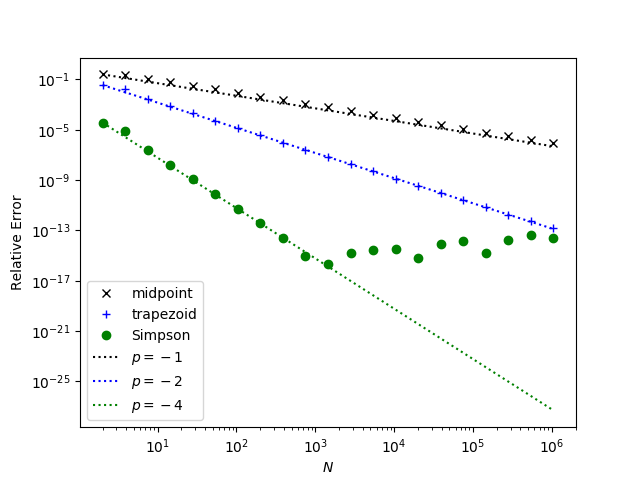

In [35]:
from matplotlib import pyplot as plt
%matplotlib notebook

plt.figure()
plt.loglog(Nsteps, midp_errors, 'kx', label='midpoint')
plt.loglog(Nsteps, trap_errors, 'b+', label='trapezoid')
plt.loglog(Nsteps, simp_errors, 'go', label='Simpson')
plt.loglog(Nsteps, Nsteps**(-1)*(midp_errors[0]/Nsteps[0]**(-1)), 'k:', label=r"$p=-1$")
plt.loglog(Nsteps, Nsteps**(-2)*(trap_errors[0]/Nsteps[0]**(-2)), 'b:', label=r"$p=-2$")
plt.loglog(Nsteps, Nsteps**(-4)*(simp_errors[0]/Nsteps[0]**(-4)), 'g:', label=r"$p=-4$")
plt.xlabel(r"$N$")
plt.ylabel("Relative Error")
plt.legend(loc="lower left")
plt.show()